In [1]:
import numpy as np
import pandas as pd

In [2]:
reviews = pd.read_csv('../../Reviews.csv')
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
reviews = reviews[['Summary', 'Text']]

reviews = reviews.dropna()
reviews.head()

,Summary,Text
0,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [109]:
# Special tokens
PARAGRAPH_START = '<p>'
PARAGRAPH_END = '</p>'
SENTENCE_START = '<s>'
SENTENCE_END = '</s>'
UNKNOWN_TOKEN = '<UNK>'
PAD_TOKEN = '<PAD>'
DOCUMENT_START = '<d>'
DOCUMENT_END = '</d>'

In [113]:
import nltk, re

def clean_text(text, remove_stopwords=True):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
        
    text = re.sub('\.{3}', '. ', text)
        
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    #text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]]', '', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(nltk.corpus.stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
        
    # Add special tokens at both ends of the text
    text = " ".join([DOCUMENT_START, PARAGRAPH_START, SENTENCE_START, text, SENTENCE_END, PARAGRAPH_END, DOCUMENT_END])
    
    # Replace '.' with sentence start/end tokens
    text = (" ".join(['', SENTENCE_END, SENTENCE_START])).join(text.split('.'))
    
    return text

In [114]:
from tqdm import tqdm

# Clean the summaries and texts
clean_summaries = []
for summary in tqdm(reviews.Summary):
    clean_summaries.append(clean_text(summary, remove_stopwords=False))

clean_texts = []
for text in tqdm(reviews.Text):
    clean_texts.append(clean_text(text, remove_stopwords=True))

100%|██████████| 568428/568428 [03:49<00:00, 2473.99it/s]


In [116]:
# Inspect the cleaned summaries and texts to ensure they have been cleaned well
for i in range(5):
    print("Review #", i+1)
    print(reviews.Summary[i], '-->', clean_summaries[i])
    print(reviews.Text[i], '-->', clean_texts[i])
    print()

Review # 1
Good Quality Dog Food --> <d> <p> <s> good quality dog food </s> </p> </d>
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most. --> <d> <p> <s> bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better </s> </p> </d>

Review # 2
Not as Advertised --> <d> <p> <s> not as advertised </s> </p> </d>
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo". --> <d> <p> <s> product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo </s> </p> </d>

Review # 3
"Deligh

In [117]:
from sklearn.model_selection import train_test_split

texts = {}
summaries = {}

texts['train'], texts['eval'], summaries['train'], summaries['eval'] = train_test_split(
    clean_texts, clean_summaries, train_size=0.8
)
texts['decode'], texts['eval'], summaries['decode'], summaries['eval'] = train_test_split(
    texts['eval'], summaries['eval'], test_size=0.5
)

In [59]:
from tensorflow.core.example import example_pb2
import struct

for mode in ['train', 'eval', 'decode']:
    with open('data/' + mode + '_food', 'wb') as data_file:
        for i in tqdm(range(len(texts[mode]))):
            tf_example = example_pb2.Example()
            tf_example.features.feature['text'].bytes_list.value.extend(
                [texts[mode][i].encode()]
            )
            tf_example.features.feature['summary'].bytes_list.value.extend(
                [summaries[mode][i].encode()]
            )
            tf_example_str = tf_example.SerializeToString()
            str_len = len(tf_example_str)
            data_file.write(struct.pack('q', str_len))
            data_file.write(struct.pack('%ds' % str_len, tf_example_str))



  3%|▎         | 14769/454742 [00:05<02:49, 2596.34it/s]

100%|██████████| 56843/56843 [00:21<00:00, 2609.01it/s]


In [122]:
token_counter = nltk.Counter()

for text in tqdm(clean_texts):
    token_counter.update(text.split())
for summary in tqdm(clean_summaries):
    token_counter.update(summary.split())


100%|██████████| 568428/568428 [00:04<00:00, 137519.20it/s]


In [123]:
token_count = sum(token_counter.values())
print(token_count, len(token_counter))

31363224 200266


In [124]:
vocab_size = 10000
vocab = []

with open('data/vocab_food', 'w') as vocab_file:
    most_common_token_count = 0
    for _, num in token_counter.most_common(vocab_size):
        most_common_token_count += num
    print(UNKNOWN_TOKEN, token_count - most_common_token_count, file=vocab_file)
    vocab.append(UNKNOWN_TOKEN)
    for token, num in token_counter.most_common(vocab_size):
        print(token, num, file=vocab_file)
        vocab.append(token)
    print(PAD_TOKEN, 5, file=vocab_file)
    vocab.append(PAD_TOKEN)
    #for token in [PARAGRAPH_END, PARAGRAPH_START, DOCUMENT_END, DOCUMENT_START]:
    #    print(token, len(processed_df), file=vocab_file)
    #for token in [SENTENCE_END, SENTENCE_START]:
    #    print(token, len(processed_df) + token_counter['.'], file=vocab_file)

len(vocab)

10002

In [82]:
for mode in ['train', 'eval', 'decode']:
    with open('data/' + mode + '_food_test_full', 'wb') as data_file:
        for i in tqdm(range(len(texts[mode]))):
            tf_example = example_pb2.Example()
            #test_input = texts[mode][i].split()
            #test_sentence = ' '.join(test_input[:6] + test_input[-3:])
            test_sentence = summaries[mode][i]
            #print(test_sentence)
            tf_example.features.feature['text'].bytes_list.value.extend(
                [test_sentence.encode()]
            )
            tf_example.features.feature['summary'].bytes_list.value.extend(
                [test_sentence.encode()]
            )
            tf_example_str = tf_example.SerializeToString()
            str_len = len(tf_example_str)
            data_file.write(struct.pack('q', str_len))
            data_file.write(struct.pack('%ds' % str_len, tf_example_str))


100%|██████████| 56843/56843 [00:21<00:00, 2643.58it/s]


In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

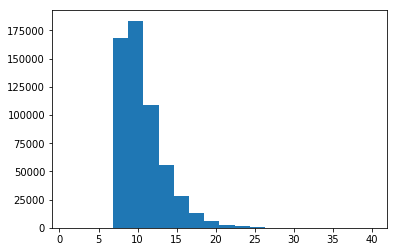

In [85]:
_ = plt.hist([len(summary.split()) for summary in clean_summaries], bins=20, range=(1, 40))

In [95]:
sum([len(summary.split()) < 15 for summary in clean_summaries]) / len(clean_summaries)

0.9080006614733968

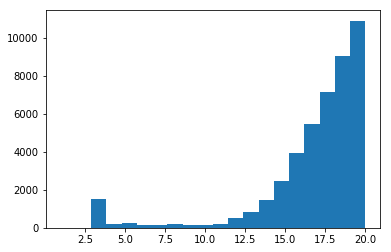

In [107]:
_ = plt.hist([len(text.split()) for text in clean_texts], bins=20, range=(1, 20))

In [104]:
sum([len(text.split()) < 30 for text in clean_texts]) / len(clean_summaries)

0.29109051630109706

In [118]:
for mode in ['train', 'eval', 'decode']:
    with open('data/' + mode + '_food_short', 'wb') as short_data_file:
        with open('data/' + mode + '_food_mid', 'wb') as mid_data_file:
            with open('data/' + mode + '_food_long', 'wb') as long_data_file:
                for i in tqdm(range(len(texts[mode]))):
                    tf_example = example_pb2.Example()
                    tf_example.features.feature['text'].bytes_list.value.extend(
                        [texts[mode][i].encode()]
                    )
                    tf_example.features.feature['summary'].bytes_list.value.extend(
                        [summaries[mode][i].encode()]
                    )
                    tf_example_str = tf_example.SerializeToString()
                    str_len = len(tf_example_str)
                    
                    text_token_count = len(texts[mode][i].split())
                    
                    data_file = None
                    if text_token_count >= 8:
                        if text_token_count < 30:
                            data_file = short_data_file
                        elif text_token_count < 50:
                            data_file = mid_data_file
                        elif text_token_count < 100:
                            data_file = long_data_file
                    if data_file:
                        data_file.write(struct.pack('q', str_len))
                        data_file.write(struct.pack('%ds' % str_len, tf_example_str))


100%|██████████| 56843/56843 [00:22<00:00, 2549.37it/s]


In [121]:
embed_dim = 300
token_to_embed = dict()

with open('/home/mburcev/varenick/glove6B/glove.6B.300d.txt') as glove_file:
    for line in glove_file:
        contents = line.split()
        token = contents[0]
        embed = np.asarray(contents[1:], dtype='float32')
        token_to_embed[token] = embed
        
len(token_to_embed)

400000

In [125]:
embedding_matrix = np.zeros((vocab_size + 2, embed_dim), dtype='float32')

for token_id in range(vocab_size + 2):
    token = vocab[token_id]
    if token in token_to_embed:
        embedding_matrix[token_id] = token_to_embed[token]
        
embedding_matrix.shape

(10002, 300)

In [126]:
embedding_matrix.mean()

-0.0041339463

In [127]:
import pickle

with open('embedding_matrix.pkl', 'wb') as embed_dump_file:
    pickle.dump(embedding_matrix, embed_dump_file)